# Расчетная работа по курсу: Теория вероятности и статистика

### Импортируем все необходимые библиотеки

Здесь:
- Numpy и его подмодули:
    - `numpy` - общий модуль для работы с тензорами и статистических вычислений
    - `PCG64` - генератор псевдослучайных значени
    - `Generator` - оболочка для генератора

- MatPlotLib и Seaborn:
    - `matplotlib.pyplot` - ядро для `seaborn`
    - `seaborn` - для красивых графиков

In [2]:
import numpy as np
from numpy.random import PCG64
from numpy.random import Generator

import matplotlib.pyplot as plt
import seaborn as sns

### Вводим константы по варианту и seed для повторяемости результатов

In [3]:
N = 500             # Размер выборки
MX = 3.9            # Мат. ожидание (mean) - средняя
DX = 4.3            # Дисперсия
SIGMA = np.sqrt(DX) # Корень от дисперсии это ср. квадратичное отклонение
GAMMA = 0.9         # Доверительная вероятность
ALPHA = 0.025       # Уровень значимости

SEED = 228          # Для повторения результатов

### 1.0 Функция нормального (Гауссовского) распределения случайной величины
$$p(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-a)^{2}}{2\sigma^{2}}}$$

Для получения этой функции воспользуемся `numpy`

In [4]:
bit_generator = PCG64(SEED)
x = Generator(bit_generator).normal(loc=MX, scale=SIGMA, size=N)
print(f"Первые 6 значений вектора:\n{str(x[:6])[1:-1].replace(' ', ', ')}...")
print(f"Размерность тензора: {x.shape}")

Первые 6 значений вектора:
5.11237389, 5.17708135, 3.88199416, 3.44511755, 7.00590171, 6.98188791...
Размерность тензора: (500,)


### 1.1 Гистограмма полученного вектора выборки и теоретической
Получанный вектор:

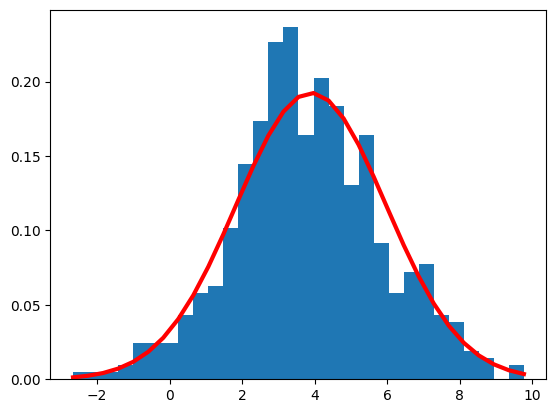

In [5]:
_, theoretic_x, _ = plt.hist(x, 30, density=True)

theoretic_normal_distribution = 1 / \
    (SIGMA * np.sqrt(2 * np.pi)) * \
    np.exp(- (theoretic_x - MX)**2 / (2 * SIGMA**2))

plt.plot(theoretic_x, theoretic_normal_distribution, linewidth=3, color='r')
plt.show()

### 1.2 Выборчная средняя и дисперсия

Формула для выборочной средней:

$$\bar{x} = \frac{1}{n}\sum_{i=0}^{n-1}x_{i}$$

Формула для выборочной дисперсии:

$$s^2 = \frac{1}{n}\sum_{i=0}^{n-1}(x_{i}-\bar{x})^2$$

In [11]:
sample_average = x.sum() / N

sum_tmp = 0

for i in range(0, N):
    sum_tmp += (x[i] - sample_average) ** 2
    
sample_variance = sum_tmp / N

print(f"Выборочная средняя: {sample_average}\nВыборочная дисперсия: {sample_variance}")

Выборочная средняя: 3.8194467898700792
Выборочная дисперсия: 4.1251165916319295
